In [74]:
import keras
import tensorflow as tf
from keras import layers
from keras.datasets import cifar10
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, UpSampling2D, BatchNormalization, MaxPool2D, SimpleRNN, Embedding, Dense, LSTM, Conv1D, Dropout, GlobalMaxPooling1D
import matplotlib.pyplot as plt
import tensorflow.keras as tfk
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
tfkl = tfk.layers

# 1

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape)

(50000, 32, 32, 3)


In [3]:
input_img = keras.Input(shape=(32,32,3))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2320      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 16)       

In [5]:
model_result1 = autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
391/391 [==============================] - 58s 149ms/step - loss: 0.5733 - val_loss: 0.5677
Epoch 2/10
391/391 [==============================] - 59s 151ms/step - loss: 0.5649 - val_loss: 0.5642
Epoch 3/10
391/391 [==============================] - 61s 155ms/step - loss: 0.5626 - val_loss: 0.5625
Epoch 4/10
391/391 [==============================] - 59s 151ms/step - loss: 0.5612 - val_loss: 0.5614
Epoch 5/10
391/391 [==============================] - 58s 150ms/step - loss: 0.5603 - val_loss: 0.5615
Epoch 6/10
391/391 [==============================] - 59s 150ms/step - loss: 0.5597 - val_loss: 0.5601
Epoch 7/10
391/391 [==============================] - 64s 164ms/step - loss: 0.5593 - val_loss: 0.5598
Epoch 8/10
391/391 [==============================] - 58s 149ms/step - loss: 0.5588 - val_loss: 0.5593
Epoch 9/10
391/391 [==============================] - 57s 146ms/step - loss: 0.5586 - val_loss: 0.5596
Epoch 10/10
391/391 [==============================] - 57s 146ms/step - l

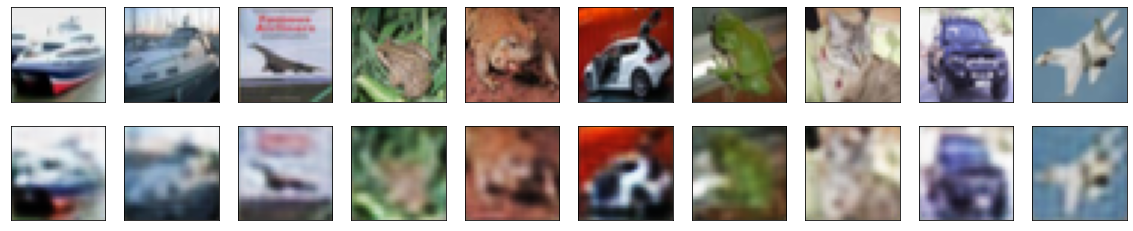

In [6]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 2

## 2.1


In [9]:
## kernel size = (3,3), strides=(1,1), padding = valid
model = Sequential()
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),padding='valid', activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),padding='valid', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [11]:
training_label = to_categorical(y_train)
test_label = to_categorical(y_test)

In [12]:
results = model.fit(x_train, training_label, batch_size=128, epochs=10,
                   validation_data=(x_test,test_label))

Epoch 1/10
391/391 [==============================] - 37s 95ms/step - loss: 1.8473 - accuracy: 0.3169 - val_loss: 1.4704 - val_accuracy: 0.4834
Epoch 2/10
391/391 [==============================] - 37s 95ms/step - loss: 1.5452 - accuracy: 0.4394 - val_loss: 1.3103 - val_accuracy: 0.5350
Epoch 3/10
391/391 [==============================] - 37s 95ms/step - loss: 1.4237 - accuracy: 0.4874 - val_loss: 1.2249 - val_accuracy: 0.5687
Epoch 4/10
391/391 [==============================] - 37s 95ms/step - loss: 1.3518 - accuracy: 0.5168 - val_loss: 1.1611 - val_accuracy: 0.5988
Epoch 5/10
391/391 [==============================] - 37s 95ms/step - loss: 1.2995 - accuracy: 0.5367 - val_loss: 1.1727 - val_accuracy: 0.5914
Epoch 6/10
391/391 [==============================] - 37s 96ms/step - loss: 1.2496 - accuracy: 0.5568 - val_loss: 1.0681 - val_accuracy: 0.6283
Epoch 7/10
391/391 [==============================] - 37s 96ms/step - loss: 1.2175 - accuracy: 0.5681 - val_loss: 1.0426 - val_accuracy:

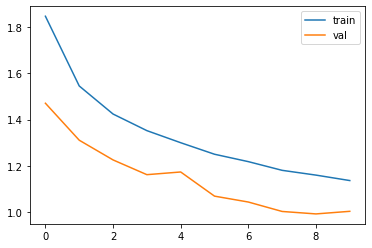

In [13]:
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "val"])

## 2.2

In [19]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
base_model.trainable = False

In [20]:
model2 = Sequential()
model2.add(base_model)
model2.add(layers.Flatten())
model2.add(tf.keras.layers.Dense(64, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 33,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [21]:
results2 = model2.fit(x_train, training_label, 
                           epochs=10, 
                           batch_size=128,
                           validation_data=(x_test,test_label))

Epoch 1/10
391/391 [==============================] - 99s 253ms/step - loss: 1.7696 - accuracy: 0.3751 - val_loss: 1.4230 - val_accuracy: 0.5142
Epoch 2/10
391/391 [==============================] - 101s 259ms/step - loss: 1.4844 - accuracy: 0.4841 - val_loss: 1.3313 - val_accuracy: 0.5450
Epoch 3/10
391/391 [==============================] - 101s 259ms/step - loss: 1.4118 - accuracy: 0.5102 - val_loss: 1.2732 - val_accuracy: 0.5598
Epoch 4/10
391/391 [==============================] - 102s 261ms/step - loss: 1.3768 - accuracy: 0.5220 - val_loss: 1.2507 - val_accuracy: 0.5665
Epoch 5/10
391/391 [==============================] - 101s 260ms/step - loss: 1.3500 - accuracy: 0.5332 - val_loss: 1.2390 - val_accuracy: 0.5704
Epoch 6/10
391/391 [==============================] - 101s 259ms/step - loss: 1.3291 - accuracy: 0.5391 - val_loss: 1.2181 - val_accuracy: 0.5777
Epoch 7/10
391/391 [==============================] - 101s 259ms/step - loss: 1.3137 - accuracy: 0.5461 - val_loss: 1.2104 - 

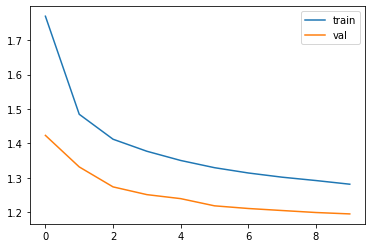

In [22]:
plt.plot(results2.history["loss"])
plt.plot(results2.history["val_loss"])
plt.legend(labels=["train", "val"])

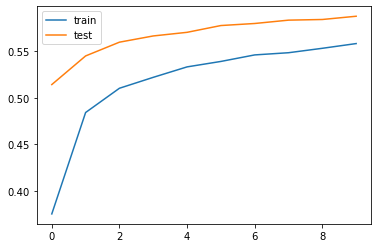

In [26]:
plt.plot(results2.history['accuracy'])
plt.plot(results2.history['val_accuracy'])
plt.legend(labels=['train','test'])

# 3

In [39]:
import pandas as pd
df = pd.read_csv('SPAM_detection.csv')


In [40]:
x = df['Message']
y = df['category_val']
x = np.asarray(x)
y = np.asarray(y)

In [41]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [52]:
sequences = tokenizer.texts_to_sequences(X_train)
word_index = tokenizer.word_index
token_XTr = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

testing_sequences = tokenizer.texts_to_sequences(X_test)
token_XTe = pad_sequences(testing_sequences, maxlen=100, padding='post', truncating='post')

In [76]:
model31 = tfk.Sequential()
model31.add(tfkl.Embedding(len(tokenizer.word_index)+1, 16, input_length=100))
model31.add(tfkl.LSTM(64,return_sequences=True))
model31.add(tfkl.GlobalMaxPool1D())
model31.add(tfkl.Dropout(0.5))
model31.add(tfkl.Dense(64,activation="relu"))
model31.add(tfkl.Dropout(0.5))
model31.add(tfkl.Dense(1,activation="sigmoid"))

In [77]:
model31.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model31.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 16)           144080    
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 64)           20736     
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 64)                0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)               

In [78]:
results31 = model31.fit(token_XTr, y_train, epochs=10, batch_size=32,validation_data=(token_XTe, y_test))

Epoch 1/10
140/140 [==============================] - 4s 31ms/step - loss: 0.4367 - accuracy: 0.8580 - val_loss: 0.3138 - val_accuracy: 0.8583
Epoch 2/10
140/140 [==============================] - 4s 27ms/step - loss: 0.2247 - accuracy: 0.9298 - val_loss: 0.1420 - val_accuracy: 0.9677
Epoch 3/10
140/140 [==============================] - 4s 27ms/step - loss: 0.0865 - accuracy: 0.9852 - val_loss: 0.1275 - val_accuracy: 0.9740
Epoch 4/10
140/140 [==============================] - 4s 26ms/step - loss: 0.0919 - accuracy: 0.9823 - val_loss: 0.1130 - val_accuracy: 0.9776
Epoch 5/10
140/140 [==============================] - 4s 27ms/step - loss: 0.0593 - accuracy: 0.9910 - val_loss: 0.1076 - val_accuracy: 0.9758
Epoch 6/10
140/140 [==============================] - 4s 26ms/step - loss: 0.0397 - accuracy: 0.9946 - val_loss: 0.1029 - val_accuracy: 0.9821
Epoch 7/10
140/140 [==============================] - 4s 26ms/step - loss: 0.0280 - accuracy: 0.9962 - val_loss: 0.1020 - val_accuracy: 0.9821

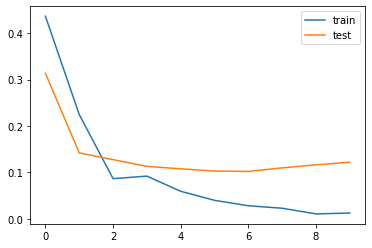

In [79]:
plt.plot(results31.history['loss'])
plt.plot(results31.history['val_loss'])
plt.legend(labels=['train','test'])
plt.show()

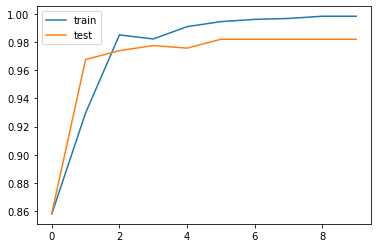

In [80]:
plt.plot(results31.history['accuracy'])
plt.plot(results31.history['val_accuracy'])
plt.legend(labels=['train','test'])
plt.show()

## 3.2

In [81]:
model32 = Sequential()
model32.add(Embedding(len(tokenizer.word_index)+1, 16, input_length=100))
model32.add(Conv1D(16, 5, activation='relu'))
model32.add(Dropout(0.5))
model32.add(GlobalMaxPooling1D())
model32.add(Dropout(0.5))
model32.add(Dense(8, activation='relu'))
model32.add(Dense(1, activation='sigmoid'))            
model32.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [82]:
results32 = model32.fit(token_XTr, y_train, epochs=10, batch_size=32,validation_data=(token_XTe, y_test))

Epoch 1/10
140/140 [==============================] - 1s 4ms/step - loss: 0.4585 - accuracy: 0.8616 - val_loss: 0.4471 - val_accuracy: 0.8583
Epoch 2/10
140/140 [==============================] - 1s 4ms/step - loss: 0.3103 - accuracy: 0.8786 - val_loss: 0.2568 - val_accuracy: 0.9022
Epoch 3/10
140/140 [==============================] - 0s 3ms/step - loss: 0.1430 - accuracy: 0.9556 - val_loss: 0.1321 - val_accuracy: 0.9794
Epoch 4/10
140/140 [==============================] - 1s 4ms/step - loss: 0.0830 - accuracy: 0.9758 - val_loss: 0.0982 - val_accuracy: 0.9821
Epoch 5/10
140/140 [==============================] - 1s 4ms/step - loss: 0.0521 - accuracy: 0.9841 - val_loss: 0.0825 - val_accuracy: 0.9839
Epoch 6/10
140/140 [==============================] - 1s 4ms/step - loss: 0.0521 - accuracy: 0.9834 - val_loss: 0.0790 - val_accuracy: 0.9821
Epoch 7/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.9874 - val_loss: 0.0772 - val_accuracy: 0.9776
Epoch 

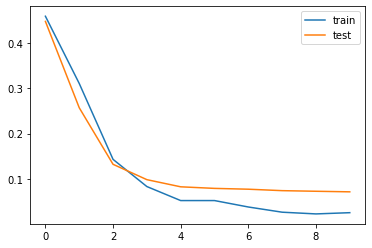

In [83]:
plt.plot(results32.history['loss'])
plt.plot(results32.history['val_loss'])
plt.legend(labels=['train','test'])
plt.show()

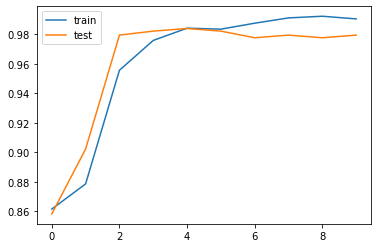

In [84]:
plt.plot(results32.history['accuracy'])
plt.plot(results32.history['val_accuracy'])
plt.legend(labels=['train','test'])
plt.show()

## 3.3

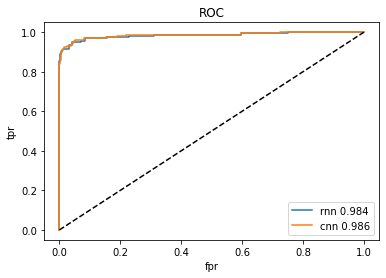

In [89]:
rnn_pred = model31.predict(token_XTe).ravel()
rnn_fpr,rnn_tpr,rnn_thresholds = roc_curve(y_test,rnn_pred)
rnn_auc = auc(rnn_fpr,rnn_tpr)

cnn_pred = model32.predict(token_XTe).ravel()
cnn_fpr,cnn_tpr,cnn_thresholds = roc_curve(y_test,cnn_pred)
cnn_auc = auc(cnn_fpr,cnn_tpr)

plt.plot(rnn_fpr,rnn_tpr,label='rnn {:.3f}'.format(rnn_auc))
plt.plot(cnn_fpr,cnn_tpr,label='cnn {:.3f}'.format(cnn_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend()
plt.show()
## The two area are pretty close. 
## The area of cnn is slightly greater than rnn. Thus, cnn is better.